In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# Step 1: Load dataframe and combine into one for ease of use

In [3]:
#Import 3 datasets from GoBike Website (2020 Datasets)
df_01 = pd.read_csv('/Users/sanchi/desktop/Udacity/Project5_GoBike/202001-baywheels-tripdata.csv')
df_02 = pd.read_csv('/Users/sanchi/desktop/Udacity/Project5_GoBike/202002_baywheels_tripdata.csv')
df_03 = pd.read_csv('/Users/sanchi/desktop/Udacity/Project5_GoBike/202003-baywheels-tripdata.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
duration_sec               295854 non-null int64
start_time                 295854 non-null object
end_time                   295854 non-null object
start_station_id           146286 non-null float64
start_station_name         146866 non-null object
start_station_latitude     295854 non-null float64
start_station_longitude    295854 non-null float64
end_station_id             145934 non-null float64
end_station_name           146511 non-null object
end_station_latitude       295854 non-null float64
end_station_longitude      295854 non-null float64
bike_id                    295854 non-null int64
user_type                  295854 non-null object
rental_access_method       185746 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 31.6+ MB


In [5]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
duration_sec               432354 non-null int64
start_time                 432354 non-null object
end_time                   432354 non-null object
start_station_id           161723 non-null float64
start_station_name         161723 non-null object
start_station_latitude     432354 non-null float64
start_station_longitude    432354 non-null float64
end_station_id             162194 non-null float64
end_station_name           162194 non-null object
end_station_latitude       432354 non-null float64
end_station_longitude      432354 non-null float64
bike_id                    432354 non-null int64
user_type                  432354 non-null object
rental_access_method       317843 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 46.2+ MB


In [6]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


In [7]:
#combine all three datasets of 2020 into one called "df_main"
df_main = pd.concat([df_01,df_02,df_03])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               905007 non-null int64
start_time                 905007 non-null object
end_time                   905007 non-null object
start_station_id           418705 non-null float64
start_station_name         419938 non-null object
start_station_latitude     905007 non-null float64
start_station_longitude    905007 non-null float64
end_station_id             419225 non-null float64
end_station_name           420499 non-null object
end_station_latitude       905007 non-null float64
end_station_longitude      905007 non-null float64
bike_id                    905007 non-null int64
user_type                  905007 non-null object
rental_access_method       617858 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 103.6+ MB


In [8]:
#save this df_main raw file as back up to computer
df_main.to_csv('/Users/sanchi/desktop/Udacity/Project5_GoBike/2020_baywheels_tripdata_combined.csv')

# Step 2: Assess & clean dataframe

In [4]:
bike_df = pd.read_csv('/Users/sanchi/desktop/Udacity/Project5_GoBike/2020_baywheels_tripdata_combined.csv')
bike_df.info()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905007 entries, 0 to 905006
Data columns (total 15 columns):
Unnamed: 0                 905007 non-null int64
duration_sec               905007 non-null int64
start_time                 905007 non-null object
end_time                   905007 non-null object
start_station_id           418705 non-null float64
start_station_name         419938 non-null object
start_station_latitude     905007 non-null float64
start_station_longitude    905007 non-null float64
end_station_id             419225 non-null float64
end_station_name           420499 non-null object
end_station_latitude       905007 non-null float64
end_station_longitude      905007 non-null float64
bike_id                    905007 non-null int64
user_type                  905007 non-null object
rental_access_method       617858 non-null object
dtypes: float64(6), int64(3), object(6)
memory usage: 103.6+ MB


In [5]:
bike_df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN
2,2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


## Questions from the dataset
* average duration time of bike rides by month
* proportion of user types (customer vs. subscriber)
* duration of bike rides each month
* duration of customers vs. subscribers on bikes (did one type ride bike longer than other type?)

In [6]:
# drop unneeded columns from dataset

bike_df.drop(['Unnamed: 0', 'rental_access_method', 'start_station_name','end_station_name','bike_id'], axis=1, inplace=True)
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,user_type
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,37.804272,-122.433537,400.0,37.804272,-122.433537,Customer
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,37.767037,-122.415442,99.0,37.767037,-122.415442,Subscriber
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,37.808848,-122.249680,197.0,37.808848,-122.249680,Customer
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,37.808848,-122.249680,197.0,37.808848,-122.249680,Customer
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,37.796389,-122.394586,371.0,37.802746,-122.413579,Customer


In [7]:
#create new column that takes duration second into minutes for easier understanding
bike_df['duration_min'] = bike_df['duration_sec'].div(60).astype(int)

In [8]:
# Break out times into day & month for graphing later 
bike_df['start_month'] = pd.DatetimeIndex(bike_df['start_time']).month
bike_df['start_day'] = pd.DatetimeIndex(bike_df['start_time']).day
bike_df['end_month'] = pd.DatetimeIndex(bike_df['end_time']).month
bike_df['end_day'] = pd.DatetimeIndex(bike_df['end_time']).day
bike_df['start_year'] = pd.DatetimeIndex(bike_df['start_time']).year
bike_df['end_year'] = pd.DatetimeIndex(bike_df['end_time']).year

In [9]:
# Create new column that has just the date the bike was rented
bike_df['start_date'] = bike_df.start_time.str[:10]
bike_df['end_date'] = bike_df.end_time.str[:10]
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,user_type,duration_min,start_month,start_day,end_month,end_day,start_year,end_year,start_date,end_date
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,37.804272,-122.433537,400.0,37.804272,-122.433537,Customer,1385,1,31,2,1,2020,2020,2020-01-31,2020-02-01
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,37.767037,-122.415442,99.0,37.767037,-122.415442,Subscriber,1137,1,31,2,1,2020,2020,2020-01-31,2020-02-01
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,37.808848,-122.249680,197.0,37.808848,-122.249680,Customer,923,1,31,2,1,2020,2020,2020-01-31,2020-02-01
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,37.808848,-122.249680,197.0,37.808848,-122.249680,Customer,915,1,31,2,1,2020,2020,2020-01-31,2020-02-01
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,37.796389,-122.394586,371.0,37.802746,-122.413579,Customer,928,1,31,2,1,2020,2020,2020-01-31,2020-02-01


In [10]:
#convert the columns to a datetime format
bike_df['start_date']= pd.to_datetime(bike_df['start_date']) 
bike_df['end_date']= pd.to_datetime(bike_df['end_date']) 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905007 entries, 0 to 905006
Data columns (total 19 columns):
duration_sec               905007 non-null int64
start_time                 905007 non-null object
end_time                   905007 non-null object
start_station_id           418705 non-null float64
start_station_latitude     905007 non-null float64
start_station_longitude    905007 non-null float64
end_station_id             419225 non-null float64
end_station_latitude       905007 non-null float64
end_station_longitude      905007 non-null float64
user_type                  905007 non-null object
duration_min               905007 non-null int64
start_month                905007 non-null int64
start_day                  905007 non-null int64
end_month                  905007 non-null int64
end_day                    905007 non-null int64
start_year                 905007 non-null int64
end_year                   905007 non-null int64
start_date                 905007 non-nul

# Step 3: Visualiztion of Data

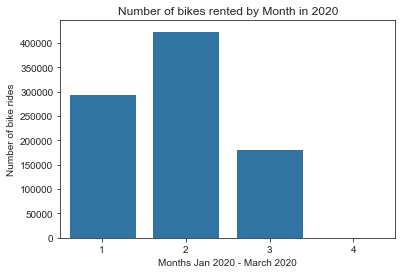

In [27]:
# Number of bike rentals by month (univariate plot)
color = sns.color_palette()[0]
sns.countplot(data=bike_df, x='start_month', color=color)
plt.title ('Number of bikes rented by Month in 2020')
plt.ylabel ('Number of bike rides')
plt.xlabel ('Months Jan 2020 - March 2020');

As shown in this graph, bike rides per month peaked in February and dipped signficantly low in March. This dip could be attributed to the spread of Covid-19. Many people started social distancing and traveling less by mid-March in the US.  

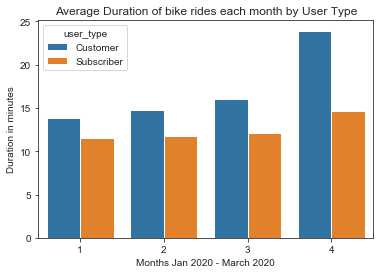

In [29]:
# Duration of bike rides by each User Type
sns.barplot(x="start_month", y="duration_min", hue="user_type", data=bike_df, ci=False)
plt.title('Average Duration of bike rides each month by User Type')
plt.xlabel('Months Jan 2020 - March 2020')
plt.ylabel('Duration in minutes');

This second graph shows the average duration of each bike ride between customers and subscribers. The data is again broken out by month to see if there is any shift in trends. The trend stays the same over each month, where customers that rent bikes tend to rent it for a longer time than subscribers.

The bar plot here is different than the bar plot above as it gives us a deeper insight on what types of customers rent bikes for a longer period of times. This is helpful information to know. Maybe, the subscribers who regularly rent the bikes use it to commute to work or to run errands and thus use it for a shorter amount of time.

(0, 1600)

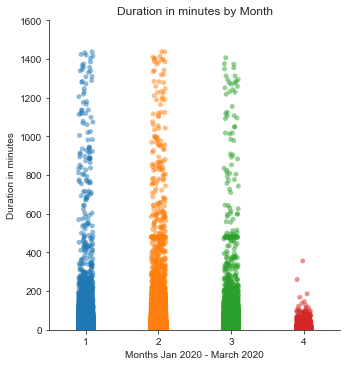

In [28]:
#categorical scattorplot of the months when bikes were rented vs. the duration it was rented for (multivariate plot)

sns.catplot(x="start_month", y="duration_min", data=bike_df, alpha=0.5)
plt.title('Duration in minutes by Month')
plt.xlabel('Months Jan 2020 - March 2020')
plt.ylabel('Duration in minutes')
plt.ylim(0,1600);

This plot is another view into duration of bike rentals. Here, I am taking away the customer vs. subscriber factor and looking purely at which months had bike rentals for a longer period of time. 

This is another way to build on top of our first bar chart. This illustrates that even though we had the most amount of bike rentals in Feb, we still had bike rentals in January and March that lasted quite some time. The length of duration in each month is about the same, with a little more density in shorter bike rides in Feb

# Adding distance between latitude & longitude

In [31]:
bike_df_coordinates = bike_df[['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude']]

In [32]:
#used following link as a source: https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/ 
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [33]:
# Calculate distance of bike rides in KM 
bike_df['KM distance'] = haversine_vectorize(bike_df_coordinates['start_station_longitude'],bike_df_coordinates['start_station_latitude'],bike_df_coordinates['end_station_longitude'],
                   bike_df_coordinates['end_station_latitude'])

In [22]:
### Filter to look at distances where there were no zero values 
### in the latitude/longittude as that skewed the distance calculations

In [34]:
bike_dist_df = bike_df[(bike_df['KM distance'] >1)]
bike_dist_df2 = bike_dist_df[(bike_dist_df['end_station_latitude'] != 0.000000) & (bike_dist_df['end_station_longitude'] != 0.000000)]
bike_dist_df2 = bike_dist_df2[(bike_dist_df2['start_station_latitude'] != 0.000000) & (bike_dist_df2['start_station_longitude'] != 0.000000)]
bike_dist_df2

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,user_type,duration_min,start_month,start_day,end_month,end_day,start_year,end_year,start_date,end_date,KM distance
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,37.796389,-122.394586,371.0,37.802746,-122.413579,Customer,928,1,31,2,1,2020,2020,2020-01-31,2020-02-01,1.811157
5,11333,2020-01-31 22:48:22.6390,2020-02-01 01:57:15.7160,60.0,37.774520,-122.409449,75.0,37.773793,-122.421239,Customer,188,1,31,2,1,2020,2020,2020-01-31,2020-02-01,1.038713
6,11341,2020-01-31 22:48:12.9890,2020-02-01 01:57:14.1650,60.0,37.774520,-122.409449,75.0,37.773793,-122.421239,Customer,189,1,31,2,1,2020,2020,2020-01-31,2020-02-01,1.038713
9,1980,2020-01-31 23:49:09.2300,2020-02-01 00:22:09.7540,238.0,37.871719,-122.273068,198.0,37.807813,-122.264496,Customer,33,1,31,2,1,2020,2020,2020-01-31,2020-02-01,7.141293
10,1969,2020-01-31 23:49:03.9720,2020-02-01 00:21:53.5730,238.0,37.871719,-122.273068,198.0,37.807813,-122.264496,Customer,32,1,31,2,1,2020,2020,2020-01-31,2020-02-01,7.141293


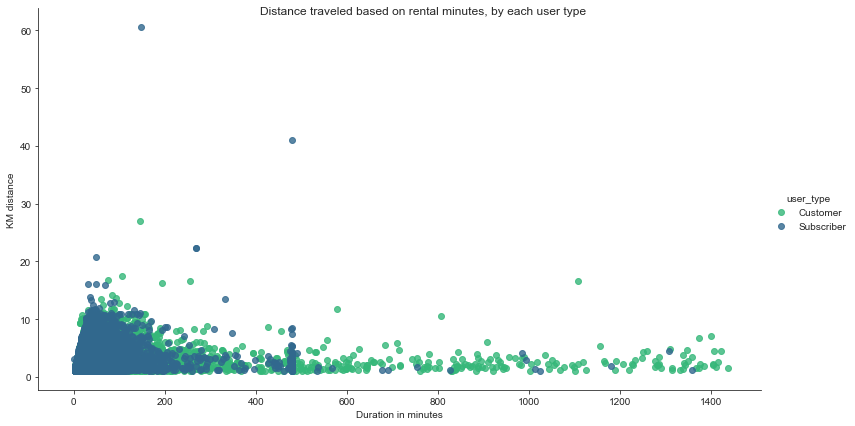

In [37]:
g = sns.FacetGrid(data=bike_dist_df2, hue='user_type', size=6, aspect=1.8, palette = 'viridis_r')

g.map(sns.regplot,'duration_min', 'KM distance', fit_reg = False);
g.add_legend()
g.fig.suptitle('Distance traveled based on rental minutes, by each user type')
plt.xlabel('Duration in minutes');

This scatterplot bring it all home. We see clearly here that over the three month average, most subscribers who rented the bike usually rented it for 350 minutes or less. Whereas, customers rented the bike for a variety amount of time and traveled a vast mount of distances. 

# Explanatory Data Analysis Summary


There were some interesting findings in this dataset. Firstly, we saw a clear drop off of bike rides during March 2020, primarily due to the spread of Covid-19. Since people started social distancing and quarantining at home, bike rentals went significantly down. This probably skewed the data as the number of bike rides were the highest in February. 

Secondly, when adding on a layer of customer vs. subscriber analysis, I saw that customers took longer bike rides on average. Subscribers tend to take shorter bike rides. Lastly, I used the latitude and longitude data to calculate approximate distance traveled during these bike rides. 

Interestingly enough, there was not a correlation between distance traveled and duration of time traveled. Many bike rides were probably leisurely taken, thus not ridden really far. A lot of subscribers tend to take the bikes a smaller distance while customers take bike rides both close and far distances.